<a href="https://colab.research.google.com/github/swethanjali24/knn-assignment/blob/main/KNN_Obesity_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the data
df=pd.read_csv('/content/drive/MyDrive/assignments-BE/KNN/Obesity Classification.csv')
df.head()


,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [ ]:
# Knowing about the data
df.head() #Numerical as well as categorical columns present,we need to classify the given parameters into any of the obesity class
df['Label'].value_counts() # Data is imbalanced


,count
Label,
Underweight,47
Normal Weight,29
Overweight,20
Obese,12


In [ ]:
# converting the output label to numerical
df['Label']=df['Label'].map({'Underweight':0,'Normal Weight':1,'Overweight':2,'Obese':3})
df.head()


,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,1
1,2,30,Female,160,60,22.5,1
2,3,35,Male,180,90,27.3,2
3,4,40,Female,150,50,20.0,0
4,5,45,Male,190,100,31.2,3


In [ ]:
# As obesity is classified purely based on bmi, this column alone can be considered for analysis as input
X=df[['BMI']]
y=df['Label']

In [ ]:
# Performing train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)


In [ ]:
# Searching for optimal value of K
from sklearn.model_selection import cross_val_score
k_range=range(1,25)
k_scores=[]

for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  scores=cross_val_score(knn,X_train,y_train,cv=5,scoring='accuracy')
  k_scores.append(scores.mean())


In [ ]:
# Printing the k_scores
print(k_scores)

[np.float64(0.9888888888888889), np.float64(0.977124183006536), np.float64(0.9424836601307189), np.float64(0.8954248366013072), np.float64(0.918954248366013), np.float64(0.8954248366013072), np.float64(0.9071895424836601), np.float64(0.8496732026143791), np.float64(0.884967320261438), np.float64(0.9084967320261438), np.float64(0.9307189542483659), np.float64(0.8960784313725491), np.float64(0.8843137254901962), np.float64(0.8372549019607843), np.float64(0.8254901960784313), np.float64(0.8137254901960784), np.float64(0.8019607843137255), np.float64(0.7784313725490195), np.float64(0.7901960784313724), np.float64(0.7901960784313724), np.float64(0.8137254901960784), np.float64(0.8019607843137255), np.float64(0.8137254901960784), np.float64(0.8254901960784313)]


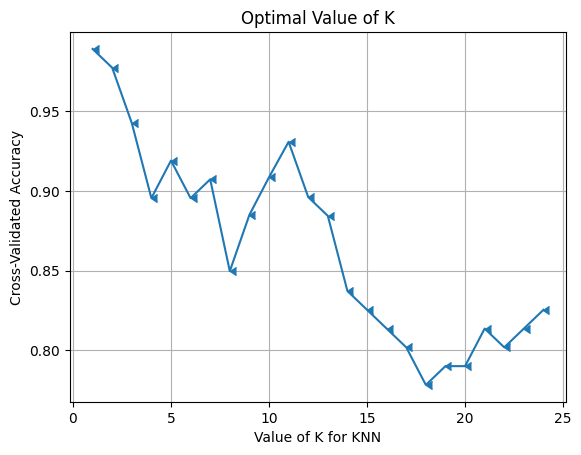

In [ ]:
# Plotting the value of K for KNN
plt.plot(k_range,k_scores,marker=4)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Optimal Value of K')
plt.grid()
plt.show()


In [ ]:
# here k=1,2 has the highest accuracy, but. we avoid taking these values as k=1(very less value of K)which may lead to overfitting,and k=2,it is divisible by 4(no.of classes-and may lead to ambiguity) hence this is also avoided as it may result in tie, the next best k value is 11, hence we go for k=11
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=11)

In [ ]:
# predicting the data
y_train_pred=knn.predict(X_train)
y_test_pred=knn.predict(X_test)

In [ ]:
# Evaluating the performance of the model
print('Training Accuracy:',np.round(accuracy_score(y_train,y_train_pred),3))
print('Training precision:',np.round(metrics.precision_score(y_train,y_train_pred),3))
print('Training recall:',np.round(metrics.recall_score(y_train,y_train_pred),3))
print('Training f1-score:',np.round(metrics.f1_score(y_train,y_train_pred,),3))
print('Training confusion matrix:\n',confusion_matrix(y_train,y_train_pred))

print('Testing Accuracy:',np.round(accuracy_score(y_test,y_test_pred),3))
print('Testing precision:',np.round(metrics.precision_score(y_test,y_test_pred),3))
print('Testing recall:',np.round(metrics.recall_score(y_test,y_test_pred),3))
print('Testing f1-score:',np.round(metrics.f1_score(y_test,y_test_pred),3))
print('Testing confusion matrix:\n',confusion_matrix(y_test,y_test_pred))

Training Accuracy: 0.895
Training precision: 0.912
Training recall: 0.895
Training f1-score: 0.897
Training confusion matrix:
 [[35  5  0  0]
 [ 0 18  2  0]
 [ 0  0 17  0]
 [ 0  0  2  7]]
Testing Accuracy: 0.864
Testing precision: 0.9
Testing recall: 0.864
Testing f1-score: 0.869
Testing confusion matrix:
 [[6 1 0 0]
 [0 8 1 0]
 [0 0 3 0]
 [0 0 1 2]]


In [ ]:
# here class 4 that is 'obese' category is mostly wrongly predicted due to less no. of traing data